In [2]:
#PULIZIA
# scarico le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scrapy as sc
import humanize

# PULIZIA file RIPARTIZIONI
with open('ripartizione-geografica_python.txt', 'r', encoding="windows-1252") as file:
    lines = file.readlines()
column_names = lines[0].strip().split('\t')
data = []
for line in lines[1:]:
    values = line.strip().split('\t')
    row_data = dict(zip(column_names, values))
    data.append(row_data)
df = pd.DataFrame(data)
df.to_csv('ripartizione-geografica_python.csv', index=False)
Ripartizione_geografica = pd.read_csv('ripartizione-geografica_python.csv')
Ripartizione_geografica.set_index('Codice Regione', inplace=True)
print(Ripartizione_geografica)

Ripartizione_geografica.to_csv('ripartizione-geografica_pulita.csv')

# PULIZIA file REGIONI
file = "covid19_italy_region_python.csv"
dati = pd.read_csv(file)

dati['TestsPerformed'] = dati['TestsPerformed'].fillna(0) # Sostituzione valori NaN con 0 alla colonna test
dati['Date'] = pd.to_datetime(dati['Date']) # Data in formato data
dati.set_index('SNo', inplace=True) # Impostazione indice
dati.drop('Country', axis=1, inplace=True) # Cancella la colonna country, in quanto inutile

# Per pulizia si rinominano le colonne
nuove_colonne = {
    'HospitalizedPatients': 'In ospedale',
    'CurrentPositiveCases': 'Positivi',
    'IntensiveCarePatients': 'Ter_intensiva',
    'RegionCode': 'Code',
    'HomeConfinement': 'In Casa',
    'TestsPerformed': 'Test'
}

# Rinomina le colonne utilizzando il metodo rename()
dati.rename(columns=nuove_colonne, inplace=True)

# Rinomina il DataFrame come df_regioni
df_regioni = pd.DataFrame(dati)

# Stampa il DataFrame rinominato
print(df_regioni)

#Salva nuovo file 
df_regioni.to_csv('covid19_italy_region_pulito.csv')

# Pulizia PROVINCE
province = pd.read_csv("./covid19_italy_province_python.csv")
df_province = pd.DataFrame(province)

# Rimuovi la colonna "Country" direttamente dal DataFrame `province`
df_province.drop("Country", axis=1, inplace=True)

# Rimuovi i NaN dal DataFrame
df_province = df_province.dropna()

# Ordina il DataFrame in ordine alfabetico in base alle regioni
df_province = df_province.sort_values(by="RegionName")

# Calcola tutte le informazioni generali che possono essere utili
print(df_province.describe())

df_province.to_csv('covid19_italy_province_pulito.csv')

#PULIZIA file COMUNI 

try:
    # Carico il file Excel
    df_comuni = pd.read_excel('Comuni_python.xlsx')
    print("Caricamento del file Excel completato con successo!")
except Exception as e:
    print("Si è verificato un errore durante il caricamento del file Excel:", e)

# Visualizzo le  informazioni sul DataFrame prima della pulizia
print("Informazioni sul DataFrame prima della pulizia:")
print(df_comuni.info())

# Seleziono solo le colonne rilevanti per l'analisi
colonne_rilevanti = ['Denominazione', 'Regione', 'Sigla automobilistica', 'Popolazione2011']
df_comuni = df_comuni[colonne_rilevanti]

# Ora faccio la gestione dei valori mancanti
# Conto i valori mancanti per ogni colonna
valori_mancanti = df_comuni.isnull().sum()
print("\nValori mancanti per ogni colonna:")
print(valori_mancanti)

# Elimino solo le righe con valori mancanti nelle colonne rilevanti
df_comuni.dropna(subset=colonne_rilevanti, inplace=True)

# Rimuovo la colonna senza nome, se presente
if 'Unnamed: 1' in df_comuni.columns:
    df_comuni.drop(columns=['Unnamed: 1'], inplace=True)

# Controllo se ci sono righe duplicate
righe_duplicate = df_comuni[df_comuni.duplicated()]
print("\nRighe duplicate:")
print(righe_duplicate)

# Visualizzo informazioni sul DataFrame dopo la pulizia
print("\nInformazioni sul DataFrame dopo la pulizia:")
print(df_comuni.info())

# Visualizzo statistiche di base per le colonne numeriche dopo la pulizia
print("\nStatistiche di base per le colonne numeriche dopo la pulizia:")
print(df_comuni.describe())

# Esegui il metodo describe() sul DataFrame
statistiche_base = df_comuni.describe()

df_comuni.to_csv('comuni_puliti.csv', index=False)  # index=False per non includere l'indice nel file CSV


               Ripartizione geografica                       Regione
Codice Regione                                                      
1                           Nord-ovest                      Piemonte
2                           Nord-ovest  Valle d'Aosta/Vallée d'Aoste
3                           Nord-ovest                     Lombardia
4                             Nord-est  Trentino-Alto Adige/Südtirol
5                             Nord-est                        Veneto
6                             Nord-est         Friuli-Venezia Giulia
7                           Nord-ovest                       Liguria
8                             Nord-est                Emilia-Romagna
9                               Centro                       Toscana
10                              Centro                        Umbria
11                              Centro                        Marche
12                              Centro                         Lazio
13                                

In [40]:

# Estrai i valori di interesse
count = statistiche_base.loc['count', 'Popolazione2011']
mean = statistiche_base.loc['mean', 'Popolazione2011']
std = statistiche_base.loc['std', 'Popolazione2011']
min_value = statistiche_base.loc['min', 'Popolazione2011']
quartile_25 = statistiche_base.loc['25%', 'Popolazione2011']
quartile_50 = statistiche_base.loc['50%', 'Popolazione2011']
quartile_75 = statistiche_base.loc['75%', 'Popolazione2011']
max_value = statistiche_base.loc['max', 'Popolazione2011']

# Formattazione dei dati utilizzando la libreria humanize
formatted_count = humanize.intword(count)
formatted_mean = humanize.intcomma(round(mean, 2))
formatted_std = humanize.intcomma(round(std, 2))
formatted_min_value = humanize.intword(min_value)
formatted_quartile_25 = humanize.intword(quartile_25)
formatted_quartile_50 = humanize.intword(quartile_50)
formatted_quartile_75 = humanize.intword(quartile_75)
formatted_max_value = humanize.intword(max_value)

# Stampare i dati formattati
print("Statistiche di base per le colonne numeriche dopo la pulizia:")
print(f"Count: {formatted_count}")
print(f"Mean: {formatted_mean}")
print(f"Std: {formatted_std}")
print(f"Min: {formatted_min_value}")
print(f"25th Percentile: {formatted_quartile_25}")
print(f"50th Percentile: {formatted_quartile_50}")
print(f"75th Percentile: {formatted_quartile_75}")
print(f"Max: {formatted_max_value}")




Statistiche di base per le colonne numeriche dopo la pulizia:
Count: 7.8 thousand
Mean: 7,207.62
Std: 38,847.81
Min: 30
25th Percentile: 1.0 thousand
50th Percentile: 2.5 thousand
75th Percentile: 6.1 thousand
Max: 2.6 million


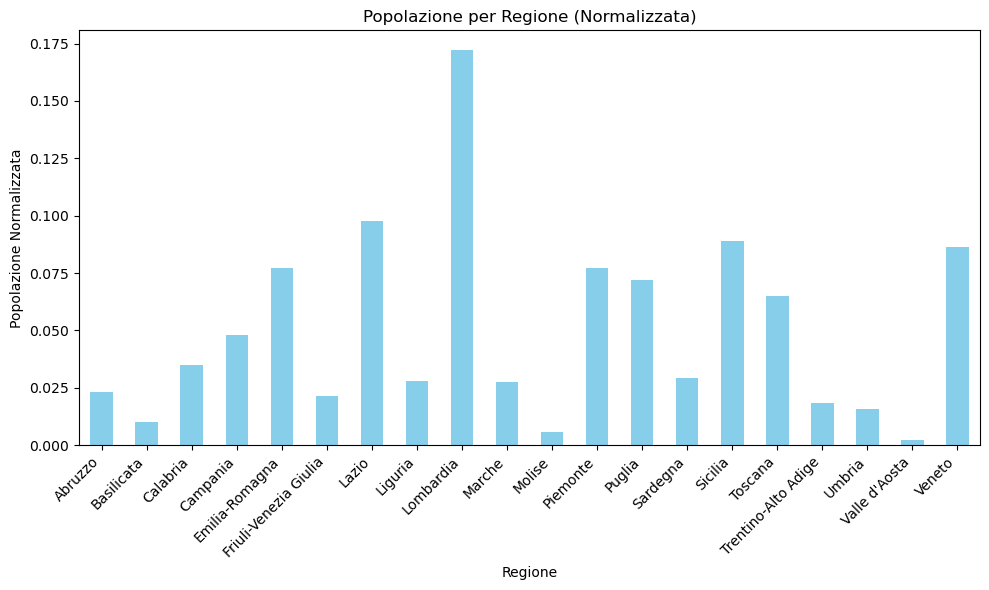

In [41]:
# Raggruppo i dati per regione e calcolo la popolazione totale di ciascuna regione
popolazione_per_regione = df_comuni.groupby('Regione')['Popolazione2011'].sum()

# Normalizzo la popolazione per regione
popolazione_normalizzata = popolazione_per_regione / popolazione_per_regione.sum()

# Creo l'istogramma
plt.figure(figsize=(10, 6))
popolazione_normalizzata.plot(kind='bar', color='skyblue')
plt.title('Popolazione per Regione (Normalizzata)')
plt.xlabel('Regione')
plt.ylabel('Popolazione Normalizzata')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
#IMPORTO FILE PULITI E JIONT PROVINCE E REGIONI
import pandas as pd

# Importa il file CSV dei comuni puliti
df_comuni = pd.read_csv('comuni_puliti.csv')

# Importa il file CSV delle province pulite
df_province = pd.read_csv('covid19_italy_province_pulito.csv')

# Importa il file CSV della ripartizione geografica pulita
df_ripartizione = pd.read_csv('ripartizione-geografica_pulita.csv')

# Importa il file CSV delle regioni pulite
df_regioni = pd.read_csv('covid19_italy_region_pulito.csv')

# Descrizione dei dati per il DataFrame dei comuni
print("Descrizione dei dati per il DataFrame dei comuni:")
print(df_comuni)

# Descrizione dei dati per il DataFrame delle province
print("\nDescrizione dei dati per il DataFrame delle province:")
print(df_province)

# Descrizione dei dati per il DataFrame della ripartizione geografica
print("\nDescrizione dei dati per il DataFrame della ripartizione geografica:")
print(df_ripartizione)

# Descrizione dei dati per il DataFrame delle regioni
print("\nDescrizione dei dati per il DataFrame delle regioni:")
print(df_regioni)

# Rinomina la colonne ripetute
df_regioni.rename(columns={'TotalPositiveCases': 'TotalPositiveCasesRegioni'}, inplace=True)
df_province.rename(columns={'TotalPositiveCases': 'TotalPositiveCasesProvince'}, inplace=True)
df_regioni.rename(columns={'Date': 'DateRegioni'}, inplace=True)
df_province.rename(columns={'Date': 'DataProvince'}, inplace=True)

# Effettua la joint tra df_province e df_regioni utilizzando la colonna RegionName come fattore comune
df_province_regioni = pd.merge(df_province[['DataProvince', 'RegionName', 'ProvinceName', 'TotalPositiveCasesProvice']],
                     df_regioni[['DateRegioni', 'RegionName', 'In ospedale', 'Ter_intensiva', 'TotalHospitalizedPatients',
                                 'In Casa', 'Positivi', 'NewPositiveCases', 'Recovered', 'Deaths',
                                 'TotalPositiveCasesRegioni', 'Test']],
                     on='RegionName')


# Converti la colonna delle date in datetime
df_province_regioni['DateRegioni'] = pd.to_datetime(df_province_regioni['DateRegioni'])
df_province_regioni['DataProvince'] = pd.to_datetime(df_province_regioni['DataProvince'])

print(df_province_regioni)





Descrizione dei dati per il DataFrame dei comuni:
        Denominazione   Regione Sigla automobilistica  Popolazione2011
0               Agliè  Piemonte                    TO           2644.0
1             Airasca  Piemonte                    TO           3819.0
2        Ala di Stura  Piemonte                    TO            462.0
3     Albiano d'Ivrea  Piemonte                    TO           1791.0
4              Almese  Piemonte                    TO           6303.0
...               ...       ...                   ...              ...
7816       Villaputzu  Sardegna                    SU           4836.0
7817       Villasalto  Sardegna                    SU           1127.0
7818      Villasimius  Sardegna                    SU           3420.0
7819         Villasor  Sardegna                    SU           6857.0
7820    Villaspeciosa  Sardegna                    SU           2407.0

[7821 rows x 4 columns]

Descrizione dei dati per il DataFrame delle province:
       Unnamed: 0 

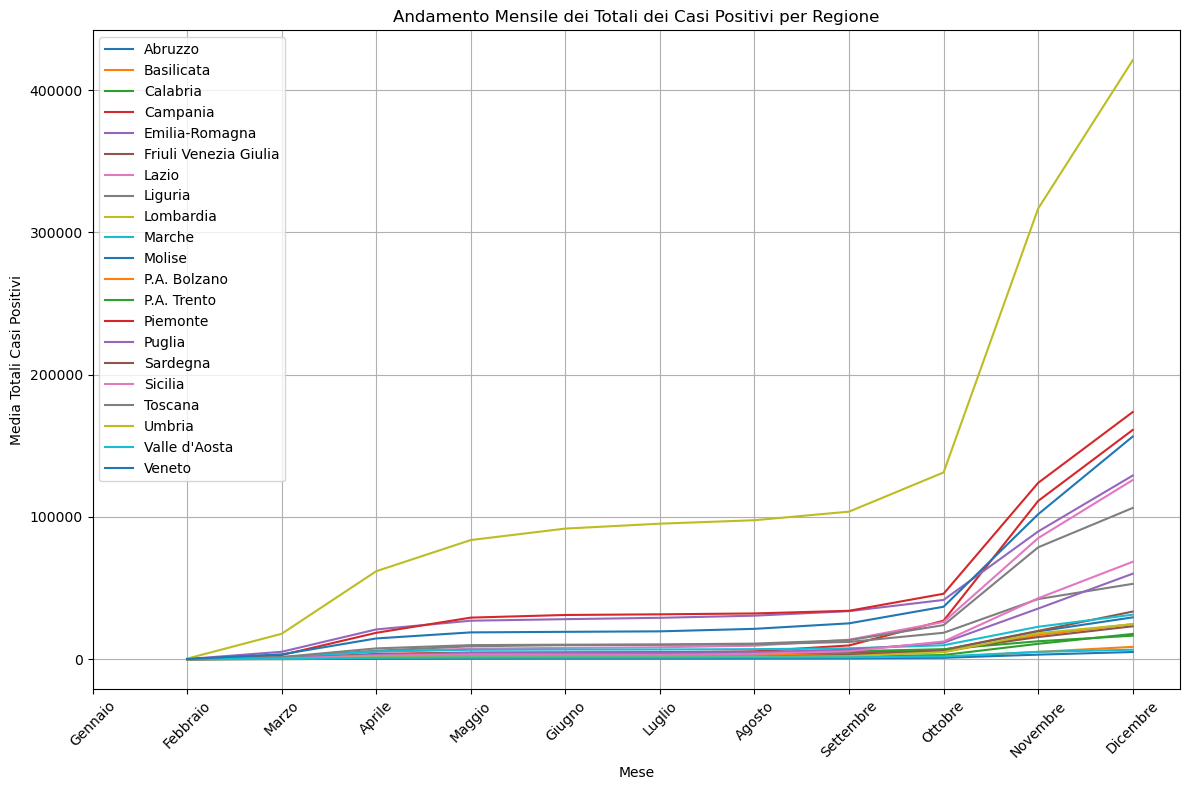

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggrega i dati per regione e mese e calcola la media dei totali dei casi positivi regionali per ogni mese
df_province_regioni['DateRegioni'] = pd.to_datetime(df_province_regioni['DateRegioni'])
df_province_regioni['Month'] = df_province_regioni['DateRegioni'].dt.month
media_totali_per_mese = df_province_regioni.groupby(['RegionName', 'Month'])['TotalPositiveCasesRegioni'].mean().reset_index()

# Grafico degli andamenti mensili dei totali dei casi positivi per regione
plt.figure(figsize=(12, 8))
for regione in media_totali_per_mese['RegionName'].unique():
    dati_regione = media_totali_per_mese[media_totali_per_mese['RegionName'] == regione]
    plt.plot(dati_regione['Month'], dati_regione['TotalPositiveCasesRegioni'], label=regione)

# Impostazioni aggiuntive del grafico
plt.title('Andamento Mensile dei Totali dei Casi Positivi per Regione')
plt.xlabel('Mese')
plt.ylabel('Media Totali Casi Positivi')
plt.xticks(range(1, 13), ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()


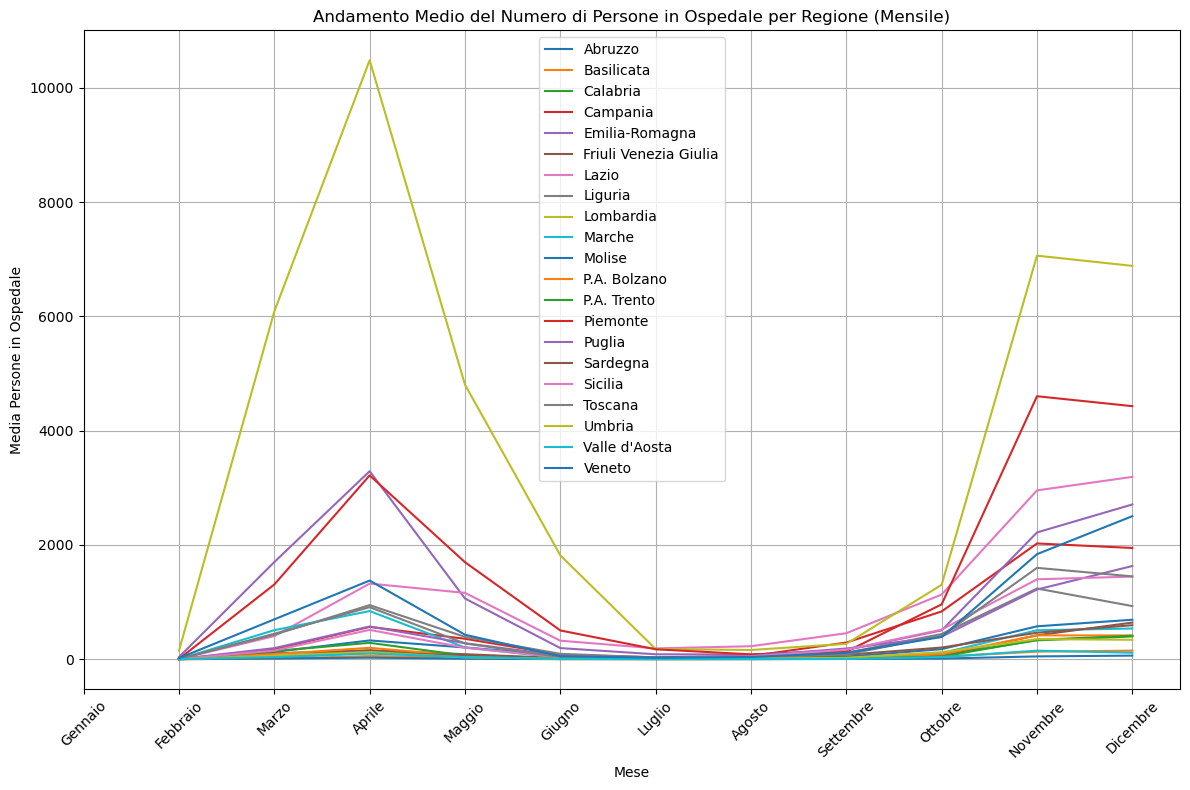

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggrega i dati per regione e mese e calcola la media del numero di persone in ospedale per ogni mese
df_province_regioni['DateRegioni'] = pd.to_datetime(df_province_regioni['DateRegioni'])
df_province_regioni['Month'] = df_province_regioni['DateRegioni'].dt.month
media_ospedalizzati_per_mese = df_province_regioni.groupby(['RegionName', 'Month'])['In ospedale'].mean().reset_index()

# Grafico degli andamenti mensili del numero medio di persone in ospedale per regione
plt.figure(figsize=(12, 8))
for regione in media_ospedalizzati_per_mese['RegionName'].unique():
    dati_regione = media_ospedalizzati_per_mese[media_ospedalizzati_per_mese['RegionName'] == regione]
    plt.plot(dati_regione['Month'], dati_regione['In ospedale'], label=regione)

# Impostazioni aggiuntive del grafico
plt.title('Andamento Medio del Numero di Persone in Ospedale per Regione (Mensile)')
plt.xlabel('Mese')
plt.ylabel('Media Persone in Ospedale')
plt.xticks(range(1, 13), ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()


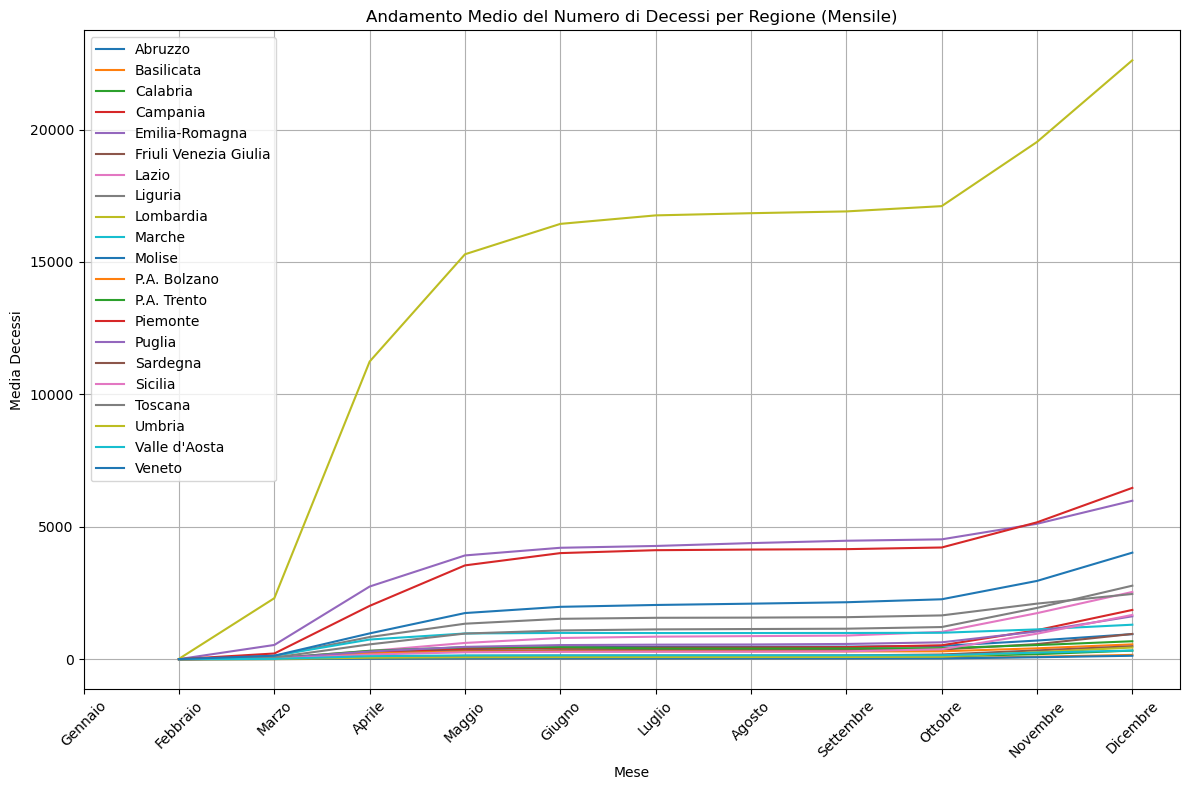

In [12]:
# Aggrega i dati per regione e mese e calcola la media del numero di decessi per ogni mese
media_decessi_per_mese = df_province_regioni.groupby(['RegionName', 'Month'])['Deaths'].mean().reset_index()

# Grafico degli andamenti mensili del numero medio di decessi per regione
plt.figure(figsize=(12, 8))
for regione in media_decessi_per_mese['RegionName'].unique():
    dati_regione = media_decessi_per_mese[media_decessi_per_mese['RegionName'] == regione]
    plt.plot(dati_regione['Month'], dati_regione['Deaths'], label=regione)

# Impostazioni aggiuntive del grafico
plt.title('Andamento Medio del Numero di Decessi per Regione (Mensile)')
plt.xlabel('Mese')
plt.ylabel('Media Decessi')
plt.xticks(range(1, 13), ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()


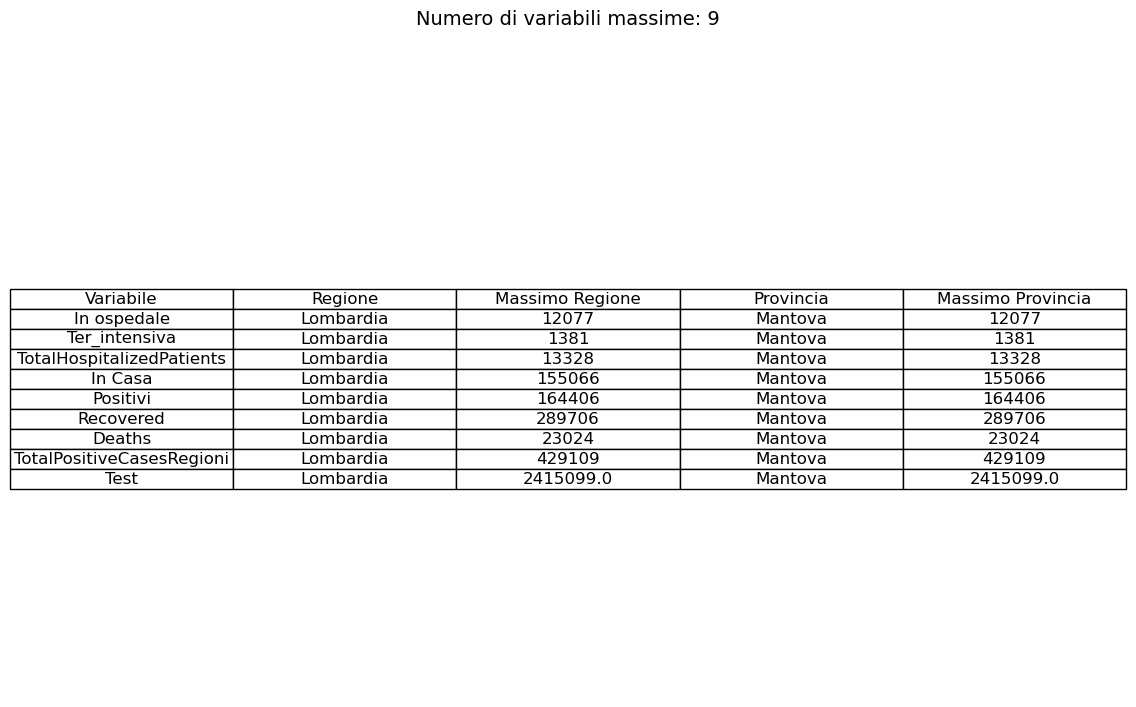

In [5]:
#MASSIMI REGIONE PROVINCIA

import matplotlib.pyplot as plt

# Trova gli indici dei massimi per ciascuna variabile
indici_massimi = {
    'In ospedale': df_province_regioni['In ospedale'].idxmax(),
    'Ter_intensiva': df_province_regioni['Ter_intensiva'].idxmax(),
    'TotalHospitalizedPatients': df_province_regioni['TotalHospitalizedPatients'].idxmax(),
    'In Casa': df_province_regioni['In Casa'].idxmax(),
    'Positivi': df_province_regioni['Positivi'].idxmax(),
    'Recovered': df_province_regioni['Recovered'].idxmax(),
    'Deaths': df_province_regioni['Deaths'].idxmax(),
    'TotalPositiveCasesRegioni': df_province_regioni['TotalPositiveCasesRegioni'].idxmax(),
    'Test': df_province_regioni['Test'].idxmax()
}

# Estrai i valori delle colonne "RegionName" e "ProvinceName" corrispondenti agli indici dei massimi
massimi_per_variabile = {}
for variabile, indice in indici_massimi.items():
    regione = df_province_regioni.loc[indice, 'RegionName']
    provincia = df_province_regioni.loc[indice, 'ProvinceName']
    massimo = df_province_regioni.loc[indice, variabile]
    massimi_per_variabile[variabile] = {'Regione': regione, 'Provincia': provincia, 'Massimo': massimo}

# Dati da visualizzare nella tabella
data = []
for variabile, info in massimi_per_variabile.items():
    data.append([variabile, info['Regione'], info['Massimo'], info['Provincia'], info['Massimo']])

# Creazione della tabella come subplot matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Creazione della tabella
table = ax.table(cellText=data, colLabels=['Variabile', 'Regione', 'Massimo Regione', 'Provincia', 'Massimo Provincia'], loc='center', cellLoc='center')

# Impostazione del layout della tabella
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Aumenta le dimensioni della tabella

# Aggiunta del numero delle variabili massime come testo
num_variabili = len(massimi_per_variabile)
ax.text(0.5, 1.1, f"Numero di variabili massime: {num_variabili}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=14)

# Visualizzazione della tabella come un'immagine PNG
plt.savefig('massimi_per_variabile_con_numero.png', bbox_inches='tight')
plt.show()


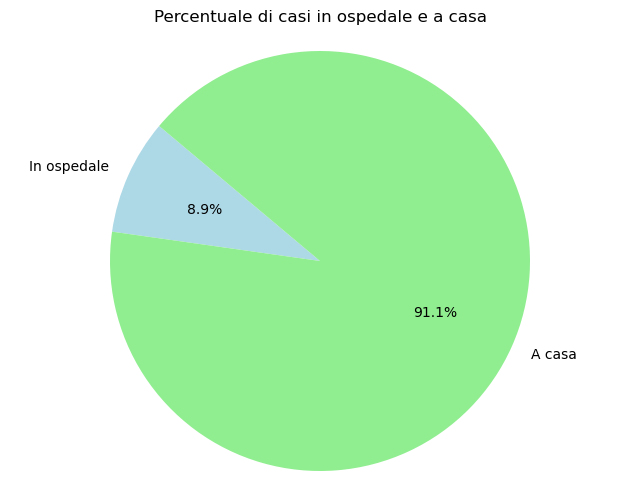

In [6]:
#GRAFICO A TORTA
import matplotlib.pyplot as plt

# Calcola il totale dei casi
totale_casi = df_province_regioni['In ospedale'].sum() + df_province_regioni['In Casa'].sum()

# Calcola la percentuale di casi in ospedale e a casa rispetto al totale
percentuale_in_ospedale = (df_province_regioni['In ospedale'].sum() / totale_casi) * 100
percentuale_in_casa = (df_province_regioni['In Casa'].sum() / totale_casi) * 100

# Etichette per le fette del grafico a torta
labels = ['In ospedale', 'A casa']

# Valori delle fette del grafico a torta
sizes = [percentuale_in_ospedale, percentuale_in_casa]

# Colori delle fette
colors = ['lightblue', 'lightgreen']

# Crea il grafico a torta
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Impostazioni aggiuntive
plt.title('Percentuale di casi in ospedale e a casa')
plt.axis('equal')  # Assicura che il grafico sia circolare

# Mostra il grafico
plt.show()


                     NewPositiveCases      Test
Date                                           
2020-02-24 18:00:00          0.003503  0.000000
2020-02-25 18:00:00          0.000367  0.000000
2020-02-26 18:00:00          0.000000  0.000000
2020-02-27 18:00:00          0.004213  0.000000
2020-02-28 18:00:00          0.003919  0.000000
...                               ...       ...
2020-12-02 17:00:00          0.505364  0.974626
2020-12-03 17:00:00          0.566995  0.981849
2020-12-04 17:00:00          0.588404  0.988003
2020-12-05 17:00:00          0.513766  0.994483
2020-12-06 17:00:00          0.460734  1.000000

[287 rows x 2 columns]


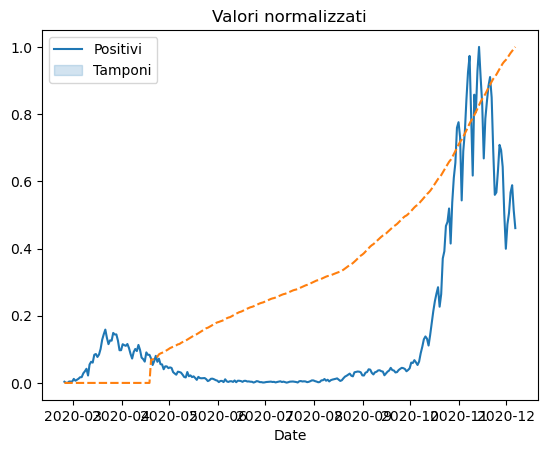

In [48]:
#Definisco funzione min max
def min_max(data):
    min_value = data.min()
    max_value = data.max()
    return (data - min_value) / (max_value - min_value)
   
#Raggruppamento dei valori per data
d1 = dati.groupby('Date')[["NewPositiveCases", "Test"]].sum()

#Faccio la standardizzazione min max sulle colonne interessate
d1[['NewPositiveCases','Test']] = min_max(d1[['NewPositiveCases','Test']])

#stampo il grafico
print(d1)
sns.lineplot(data = d1[["NewPositiveCases","Test"]], palette="tab10", linewidth=1.5)
plt.title('Valori normalizzati')
plt.legend(labels = ['Positivi','Tamponi'])
plt.show()

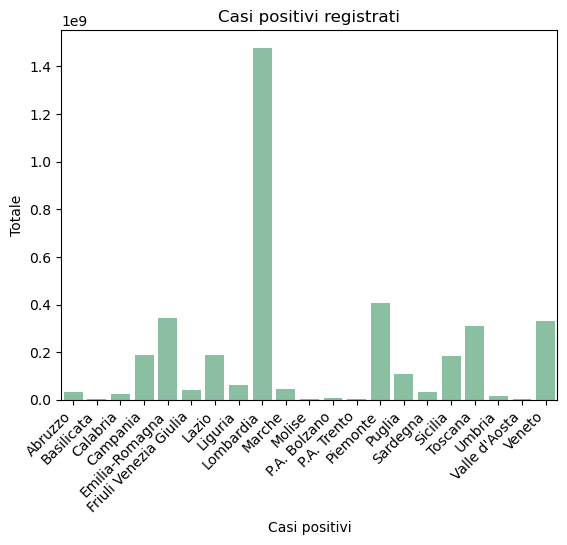

In [57]:
#Raggruppo per regione
dati_raggruppati = df_province_regioni.groupby('RegionName')["NewPositiveCases"].sum().reset_index()


#Creiamo il grafico
sns.barplot(x="RegionName", y="NewPositiveCases", data=dati_raggruppati, color="#82c89f")
plt.title('Casi positivi registrati')
plt.xlabel('Casi positivi')
plt.ylabel('Totale')
plt.xticks(rotation=45, ha = "right")
plt.show()

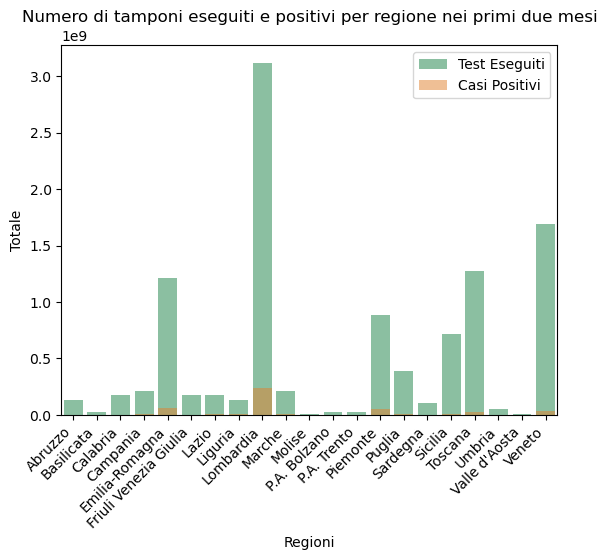

In [63]:
# Imposta l'intervallo di date per i primi due mesi
inizio_primi_due_mesi = '2020-02-24'
fine_primi_due_mesi = '2020-04-24'

# Filtra i dati per il periodo dei primi due mesi
dati_primi_due_mesi = df_province_regioni[df_province_regioni['DateRegioni'].between(inizio_primi_due_mesi, fine_primi_due_mesi)]

# Raggruppa i dati per regione in quel periodo
dati_raggruppati = dati_primi_due_mesi.groupby('RegionName')[['Test', 'NewPositiveCases']].sum().reset_index()

# Visualizza il grafico a barre
sns.barplot(x="RegionName", y="Test", data=dati_raggruppati, color="#82c89f", label="Test Eseguiti")
sns.barplot(x="RegionName", y="NewPositiveCases", data=dati_raggruppati, color="#ff7f0e", label="Casi Positivi", alpha=0.5)
plt.title('Numero di tamponi eseguiti e positivi per regione nei primi due mesi')
plt.xlabel('Regioni')
plt.ylabel('Totale')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()
